   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64
       sepal_length  sepal_width  petal_length  petal_width
count     81.000000    81.000000     81.000000    81.000000
mean       5.945679     3.033333      3.946914     1.264198
std        0.840097     0.448330      1.745357     0.740829
min        4.300000     2.000000      1.100000     0.100000
25%        5.300000     2.800000      1.600000     0.400000
50%        6.000000     3.000000      4.500000    

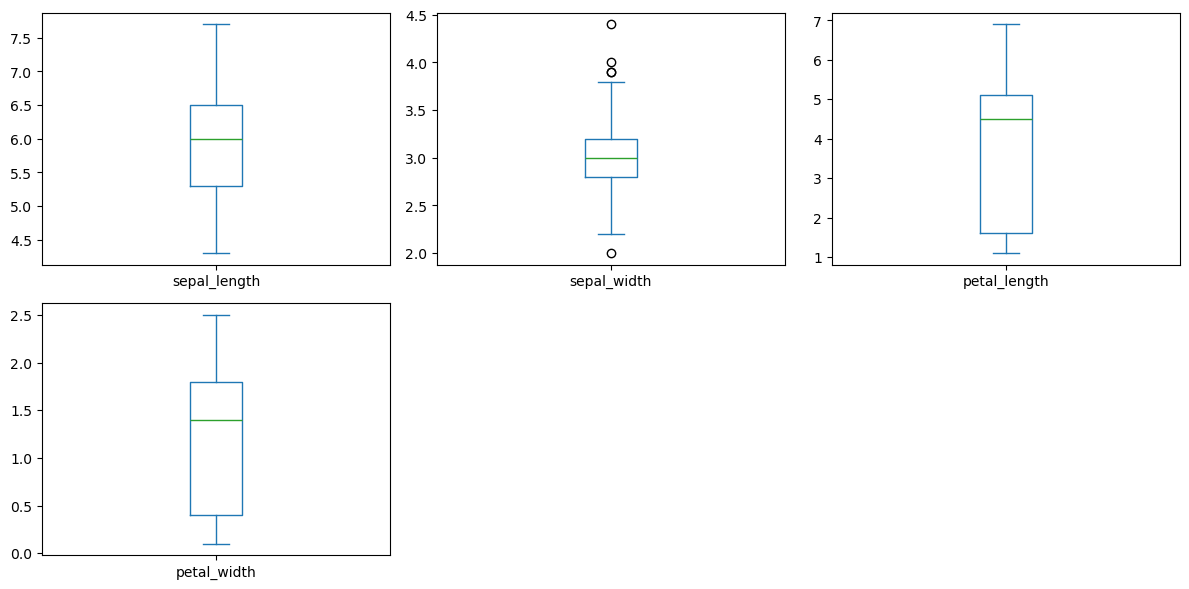

Confusion Matrix:
 [[6 0 0]
 [0 7 0]
 [0 0 4]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         6
  versicolor       1.00      1.00      1.00         7
   virginica       1.00      1.00      1.00         4

    accuracy                           1.00        17
   macro avg       1.00      1.00      1.00        17
weighted avg       1.00      1.00      1.00        17

Accuracy: 1.00
Error Rate: 0.00
            setosa  versicolor  virginica
setosa           6           0          0
versicolor       0           7          0
virginica        0           0          4

Class: setosa
TP: 6, FP: 0, FN: 0, TN: 11
Accuracy: 1.00, Error Rate: 0.00
Precision: 1.00, Recall: 1.00

Class: versicolor
TP: 7, FP: 0, FN: 0, TN: 10
Accuracy: 1.00, Error Rate: 0.00
Precision: 1.00, Recall: 1.00

Class: virginica
TP: 4, FP: 0, FN: 0, TN: 13
Accuracy: 1.00, Error Rate: 0.00
Precision: 1.00, Recall: 1.00


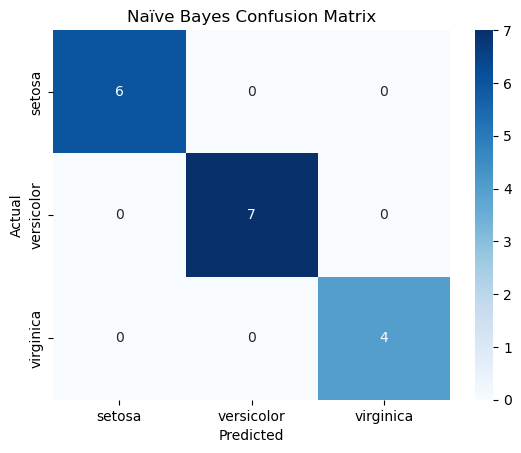

In [3]:
"""
Problem Statement: Data Analytics III

1. Implement Simple Naïve Bayes classification algorithm using Python/R on iris.csv dataset.
2. Compute Confusion matrix to find TP, FP, TN, FN, Accuracy, Error rate, Precision, Recall on the given dataset.
"""

# Import necessary libraries
import pandas as pd                      # For data manipulation
import numpy as np                       # For numerical operations
from sklearn.model_selection import train_test_split     # To split dataset
from sklearn.naive_bayes import GaussianNB               # Naive Bayes classifier
from sklearn.metrics import (confusion_matrix, 
                             classification_report, 
                             accuracy_score)             # Evaluation metrics
from sklearn.preprocessing import StandardScaler         # Feature normalization
import seaborn as sns                     # For visualization
import matplotlib.pyplot as plt          # For plotting

# Step 1: Load the dataset
df = pd.read_csv('iris6th.csv')          # Load the Iris dataset from CSV file
print(df.head())                         # Display the first few rows of the dataset

# Step 2: Data Preprocessing
# Check for missing values in each column
print(df.isnull().sum())

# Handle missing values in numerical columns using mean/median
df['sepal_length'] = df['sepal_length'].fillna(df['sepal_length'].mean())
df['sepal_width'] = df['sepal_width'].fillna(df['sepal_width'].median())
df['petal_length'] = df['petal_length'].fillna(df['petal_length'].mean())
df['petal_width'] = df['petal_width'].fillna(df['petal_width'].median())

# Handle missing values in categorical column using mode
df['species'] = df['species'].fillna(df['species'].mode()[0])

# Verify again if any missing values remain
print(df.isnull().sum())

# Step 3: Basic Statistics and Data Types
print(df.describe())                    # Summary statistics for numerical columns
print(df.dtypes)                        # Data types of each column

# Step 4: Detect Outliers using Boxplot
df.plot(kind='box', subplots=True, layout=(2, 3), figsize=(12, 6))  # Box plots for each column
plt.tight_layout()
plt.show()

# Step 5: Normalize the Data
X = df.drop('species', axis=1)         # Features
y = df['species']                      # Target

scaler = StandardScaler()              # Initialize the StandardScaler
X_scaled = scaler.fit_transform(X)     # Normalize the features

# Step 6: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)  # 80% training and 20% testing

# Step 7: Train Naive Bayes Classifier
model = GaussianNB()                   # Initialize Naive Bayes classifier
model.fit(X_train, y_train)            # Train the model with training data

# Step 8: Predict on Test Set
y_pred = model.predict(X_test)         # Predict the target for test data

# Step 9: Confusion Matrix and Evaluation Metrics
cm = confusion_matrix(y_test, y_pred)  # Confusion matrix
print("Confusion Matrix:\n", cm)

# Classification report including precision, recall, and f1-score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Accuracy and Error Rate
accuracy = accuracy_score(y_test, y_pred)
error_rate = 1 - accuracy
print(f"Accuracy: {accuracy:.2f}")
print(f"Error Rate: {error_rate:.2f}")

# Display confusion matrix in a labeled DataFrame
labels = df['species'].unique()
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print(cm_df)

# Step 10: Compute TP, FP, TN, FN, Accuracy, Error Rate, Precision, Recall for each class
total = np.sum(cm)  # Total number of samples

for i, label in enumerate(labels):
    TP = cm[i, i]                             # True Positives
    FP = cm[:, i].sum() - TP                  # False Positives
    FN = cm[i, :].sum() - TP                  # False Negatives
    TN = total - (TP + FP + FN)               # True Negatives

    accuracy = (TP + TN) / total              # Accuracy calculation
    error_rate = 1 - accuracy                 # Error Rate
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0  # Avoid division by zero
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0      # Avoid division by zero

    # Print the results for the current class
    print(f"\nClass: {label}")
    print(f"TP: {TP}, FP: {FP}, FN: {FN}, TN: {TN}")
    print(f"Accuracy: {accuracy:.2f}, Error Rate: {error_rate:.2f}")
    print(f"Precision: {precision:.2f}, Recall: {recall:.2f}")

# Step 11: Visualize Confusion Matrix as Heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naïve Bayes Confusion Matrix')
plt.show()
